In [1]:
from sklearn.metrics import accuracy_score
from utils import calculate_FPR_TPR, plot_ROC_curve, plot_coefficents_chart, plot_All_coefficents_chart
from RandomForest import RandomForest
from Perceptron import Perceptron
import numpy as np
import math

Features = [
    "round_number",
    "team_1",
    "team_2",
    "t1_side",
    "t2_side",
    "t1_money",
    "t2_money",
    "t1_rank",
    "t2_rank",
    "map_0",
    "map_1",
    "map_2",
    "map_3",
    "map_4",
    "map_5",
    "map_6",
    "map_7",
    "map_8",
    "map_9",
]

coefficent_chart_features = ['Round #', 'Team Name', 'Side (CT/T)', 'Money', 'Team Rank', 'Map']

----------
Perceptron
----------

Accuracy: 0.6460599295587431


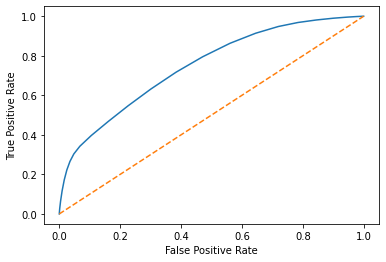

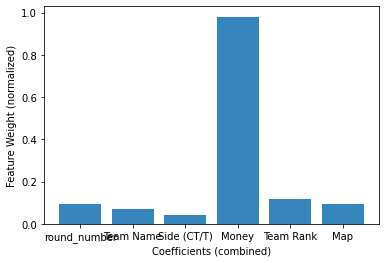

Stored 'predictions_p' (ndarray)


In [2]:
# create model object
perceptron = Perceptron()

# perform any preprocessing for this model, and split into train/test sets
X_train, X_test, y_train, y_test = perceptron.pre_process(Features)

# fit model using train set
perceptron.fit(X_train, y_train)

# use fitted model to make predictions on test set
predictions = perceptron.predict(X_test)

# print the accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# TPR, FPR, ROC
fpr_list, tpr_list = calculate_FPR_TPR(X_test, y_test, perceptron.predict_proba)

# plot ROC curve
plot_ROC_curve(fpr_list, tpr_list)

# weights chart setup
weights = perceptron.weights
np.abs(weights, out=weights)
values = []
values.append(np.sum(weights[0]) / 2)
values.append(np.sum(weights[1:2]) / 2)
values.append(np.sum(weights[3:4]) / 2)
values.append(np.sum(weights[5:6]) / 2)
values.append(np.sum(weights[7:8]) / 2)
values.append(np.sum(weights[9:18]) / (10))
values = values / np.linalg.norm(values)

# plot coefficient weights
plot_coefficents_chart(coefficent_chart_features, values)

predictions_p = predictions
%store predictions_p

-------------------
Logistic Regression
-------------------

In [ ]:
# create model object


# perform any preprocessing for this model, and split into train/test sets


# fit model using train set


# use fitted model to make predictions on test set


# print the accuracy score

-------------
Random Forest
-------------

In [4]:
# create model object
forest = RandomForest()

# perform any preprocessing for this model, and split into train/test sets
X_train, X_test, y_train, y_test = forest.pre_process(Features, use_scalar=True)

# fit model using train set
forest.fit(X_train, y_train)

# use fitted model to make predictions on test set
predictions = forest.predict(X_test)
print(predictions, y_test)

# print the accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

count = np.count_nonzero(predictions== 1)
print(count, predictions.__len__())

predictions_rf = predictions
%store predictions_rf

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0. 0. 0. ... 0. 0. 0.] [1 0 1 ... 0 1 0]
Accuracy: 0.5119474382070339
1 605611


-----------
Naive Bayes
-----------

In [ ]:
# create model object


# perform any preprocessing for this model, and split into train/test sets


# fit model using train set


# use fitted model to make predictions on test set


# print the accuracy score

-----------
Combined Comparison
-----------

In [ ]:
#Stuff